# DART 재무제표 EDA
2015~2023년 데이터 샘플을 기반으로 한 탐색적 데이터 분석

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 파일 경로 (사용자 환경에 맞게 수정 필요)
file_path = 'dart_statements_2015_2023_merged.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', engine='openpyxl')
df.head()

,corp_code,corp_name,stock_code,bsns_year,rcept_no,reprt_code,fs_div,fs_nm,sj_div,sj_nm,...,thstrm_dt,thstrm_amount,frmtrm_nm,frmtrm_dt,frmtrm_amount,bfefrmtrm_nm,bfefrmtrm_dt,bfefrmtrm_amount,ord,currency
0,119195,동화약품,20,2017,20180618000261,11011,CFS,재무제표,BS,재무상태표,...,2017.12.31 현재,"234,500,029,735",제 88 기,2016.12.31 현재,"151,491,847,872",제 87 기,2015.12.31 현재,"135,014,685,939",2,KRW
1,119195,동화약품,20,2017,20180618000261,11011,CFS,재무제표,BS,재무상태표,...,2017.12.31 현재,"132,725,103,693",제 88 기,2016.12.31 현재,"173,112,688,778",제 87 기,2015.12.31 현재,"182,172,344,113",4,KRW
2,119195,동화약품,20,2017,20180618000261,11011,CFS,재무제표,BS,재무상태표,...,2017.12.31 현재,"367,225,133,428",제 88 기,2016.12.31 현재,"324,604,536,650",제 87 기,2015.12.31 현재,"317,187,030,052",6,KRW
3,119195,동화약품,20,2017,20180618000261,11011,CFS,재무제표,BS,재무상태표,...,2017.12.31 현재,"60,716,648,749",제 88 기,2016.12.31 현재,"55,452,075,959",제 87 기,2015.12.31 현재,"68,981,227,859",8,KRW
4,119195,동화약품,20,2017,20180618000261,11011,CFS,재무제표,BS,재무상태표,...,2017.12.31 현재,"9,563,756,250",제 88 기,2016.12.31 현재,"16,227,160,789",제 87 기,2015.12.31 현재,"18,088,059,768",10,KRW


## 1. 데이터 정제 및 전처리

In [5]:
# 금액 관련 열 숫자형 변환
for col in ['thstrm_amount', 'frmtrm_amount', 'bfefrmtrm_amount']:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('-', '0')
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.isnull().sum()

corp_code              0
corp_name           9908
stock_code             0
bsns_year              0
rcept_no               0
reprt_code             0
fs_div                 0
fs_nm                  0
sj_div                 0
sj_nm                  0
account_nm             0
thstrm_nm              0
thstrm_dt              0
thstrm_amount          0
frmtrm_nm           2132
frmtrm_dt           2132
frmtrm_amount          0
bfefrmtrm_nm        5455
bfefrmtrm_dt        5455
bfefrmtrm_amount       0
ord                    0
currency               0
dtype: int64

## 2. 기본 통계 및 구조 분석

In [6]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469672 entries, 0 to 469671
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   corp_code         469672 non-null  int64 
 1   corp_name         459764 non-null  object
 2   stock_code        469672 non-null  int64 
 3   bsns_year         469672 non-null  int64 
 4   rcept_no          469672 non-null  int64 
 5   reprt_code        469672 non-null  int64 
 6   fs_div            469672 non-null  object
 7   fs_nm             469672 non-null  object
 8   sj_div            469672 non-null  object
 9   sj_nm             469672 non-null  object
 10  account_nm        469672 non-null  object
 11  thstrm_nm         469672 non-null  object
 12  thstrm_dt         469672 non-null  object
 13  thstrm_amount     469672 non-null  int64 
 14  frmtrm_nm         467540 non-null  object
 15  frmtrm_dt         467540 non-null  object
 16  frmtrm_amount     469672 non-null  int

,corp_code,corp_name,stock_code,bsns_year,rcept_no,reprt_code,fs_div,fs_nm,sj_div,sj_nm,...,thstrm_dt,thstrm_amount,frmtrm_nm,frmtrm_dt,frmtrm_amount,bfefrmtrm_nm,bfefrmtrm_dt,bfefrmtrm_amount,ord,currency
count,4.696720e+05,459764,469672.000000,469672.000000,4.696720e+05,469672.0,469672,469672,469672,469672,...,469672,4.696720e+05,467540,467540,4.696720e+05,464217,464217,4.696720e+05,469672.000000,469672
unique,NaN,2642,NaN,NaN,NaN,NaN,1,2,2,2,...,246,NaN,122,286,NaN,175,268,NaN,NaN,5
top,NaN,원익피앤이,NaN,NaN,NaN,NaN,CFS,재무제표,BS,재무상태표,...,2023.12.31 현재,NaN,제 21 기,2022.12.31 현재,NaN,제 20 기,2021.12.31 현재,NaN,NaN,KRW
freq,NaN,427,NaN,NaN,NaN,NaN,469672,261305,297457,297457,...,40003,NaN,16959,39519,NaN,16779,39227,NaN,NaN,466446
mean,4.524608e+05,NaN,97852.763546,2019.378664,2.020496e+13,11011.0,NaN,NaN,NaN,NaN,...,NaN,3.844428e+12,NaN,NaN,4.051820e+12,NaN,NaN,3.472926e+12,19.162022,NaN
std,3.684274e+05,NaN,116859.691891,2.570524,2.574174e+10,0.0,NaN,NaN,NaN,NaN,...,NaN,4.084616e+14,NaN,NaN,4.333175e+14,NaN,NaN,3.740169e+14,15.582854,NaN
min,1.002580e+05,NaN,20.000000,2015.000000,2.015062e+13,11011.0,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,1.000000,NaN
25%,1.527290e+05,NaN,18260.000000,2017.000000,2.018041e+13,11011.0,NaN,NaN,NaN,NaN,...,NaN,9.308446e+09,NaN,NaN,8.496074e+09,NaN,NaN,7.530284e+09,8.000000,NaN
50%,3.300440e+05,NaN,60590.000000,2020.000000,2.021032e+13,11011.0,NaN,NaN,NaN,NaN,...,NaN,3.654446e+10,NaN,NaN,3.380751e+10,NaN,NaN,3.044289e+10,17.000000,NaN
75%,6.162900e+05,NaN,127710.000000,2022.000000,2.023032e+13,11011.0,NaN,NaN,NaN,NaN,...,NaN,1.302347e+11,NaN,NaN,1.210324e+11,NaN,NaN,1.115475e+11,26.000000,NaN


## 3. 회사별 재무 계정 분포

In [8]:
df.groupby(['corp_name', 'account_nm'])['thstrm_amount'].mean().reset_index().head(10)

,corp_name,account_nm,thstrm_amount
0,3S,당기순이익,2.796134e+09
1,3S,당기순이익(손실),2.796134e+09
2,3S,매출액,2.701468e+10
3,3S,법인세차감전 순이익,2.826570e+09
4,3S,부채총계,2.151052e+10
5,3S,비유동부채,4.598625e+09
6,3S,비유동자산,3.896154e+10
7,3S,영업이익,1.647058e+09
8,3S,유동부채,1.691190e+10
9,3S,유동자산,1.771173e+10


## 4. 연도별 주요 계정 추이 시각화

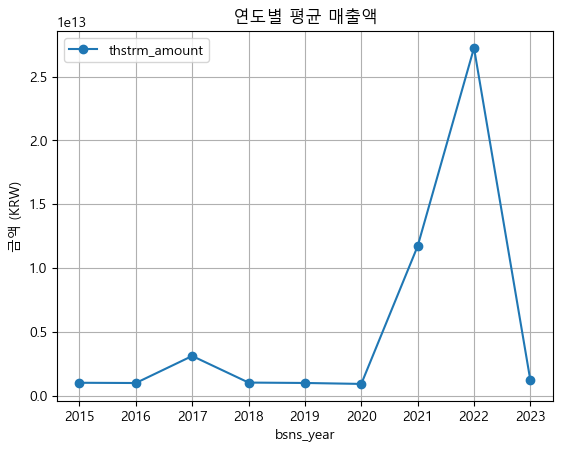

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 한글 폰트 설정 (OS에 따라 다르게 적용)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux (예: 구글 Colab)
    plt.rc('font', family='NanumGothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 기존 시각화 코드
selected = df[df['account_nm'].str.contains('매출', na=False)]
pivot = selected.pivot_table(index='bsns_year', values='thstrm_amount', aggfunc='mean')
pivot.plot(marker='o')
plt.title('연도별 평균 매출액')
plt.ylabel('금액 (KRW)')
plt.grid(True)
plt.show()


## 5. 계정 항목별 분포 (상위 항목)

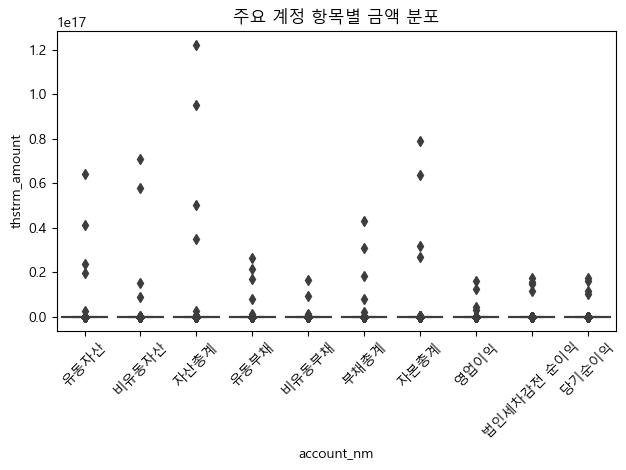

In [11]:
top_accounts = df['account_nm'].value_counts().head(10).index.tolist()
top_data = df[df['account_nm'].isin(top_accounts)]
sns.boxplot(data=top_data, x='account_nm', y='thstrm_amount')
plt.xticks(rotation=45)
plt.title('주요 계정 항목별 금액 분포')
plt.tight_layout()
plt.show()

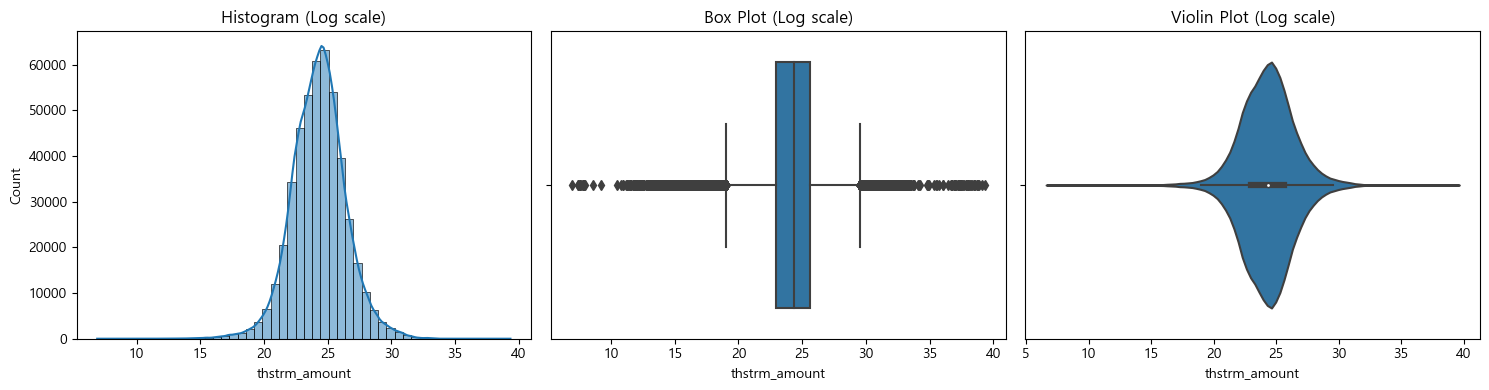

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 로그 변환 (극단값 완화용, 0은 제외)
data = df['thstrm_amount'].dropna()
data = data[data > 0]
log_data = np.log1p(data)

plt.figure(figsize=(15, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(log_data, bins=50, kde=True)
plt.title('Histogram (Log scale)')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=log_data)
plt.title('Box Plot (Log scale)')

# Violin Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=log_data)
plt.title('Violin Plot (Log scale)')

plt.tight_layout()
plt.show()


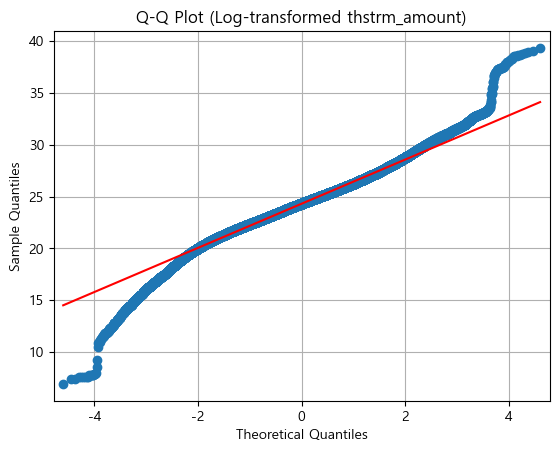

In [13]:
import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(log_data, line='s')
plt.title('Q-Q Plot (Log-transformed thstrm_amount)')
plt.grid(True)
plt.show()


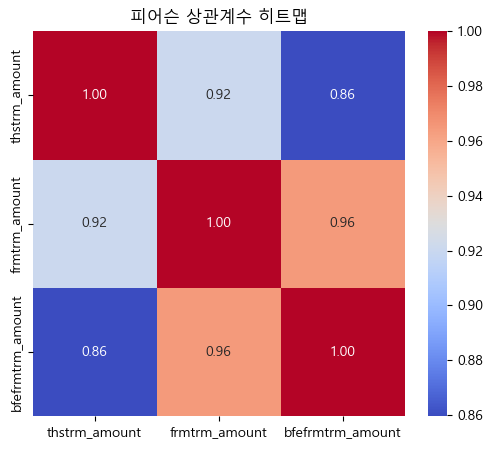

In [14]:
# 숫자형 열만 선택 후 상관계수 계산
numeric_df = df[['thstrm_amount', 'frmtrm_amount', 'bfefrmtrm_amount']].copy()

# 전처리
for col in numeric_df.columns:
    numeric_df[col] = numeric_df[col].astype(str).str.replace(',', '').str.replace('-', '0')
    numeric_df[col] = pd.to_numeric(numeric_df[col], errors='coerce')

# 상관계수 계산
corr = numeric_df.corr(method='pearson')

# 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('피어슨 상관계수 히트맵')
plt.show()
